In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import classification_report
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [2]:
wine =  pd.read_csv("C:\\Users\\Dell\\Desktop\\Nithya VB\\project1\\winequality-red.csv")

In [3]:
wine.info()
wine.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

In [4]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df = pd.DataFrame(wine)

In [8]:
def overlook(dataframe):
    print('The no. of null values in each column are:\n',df.isnull().sum())
    return

overlook(df)

The no. of null values in each column are:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
wine.dtypes.index

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
categorical_columns = wine.dtypes[wine.dtypes == 'object'].index
print(categorical_columns)

Index([], dtype='object')


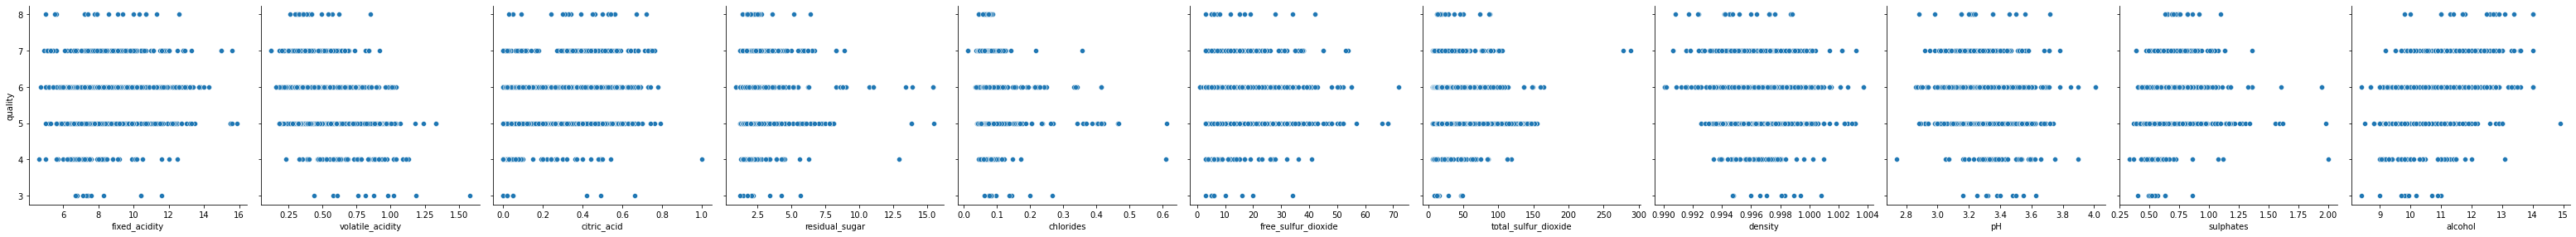

In [11]:
sns.pairplot(wine, x_vars=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], y_vars='quality', height=4, aspect=1, kind='scatter')
plt.show()

In [12]:
wine.quality.isnull().sum()

0

In [13]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
wine.free_sulfur_dioxide.value_counts()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free_sulfur_dioxide, dtype: int64

In [15]:
wine.citric_acid.value_counts()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric_acid, Length: 80, dtype: int64

## Quality


Text(0.5, 1.0, 'Barplot of quality')

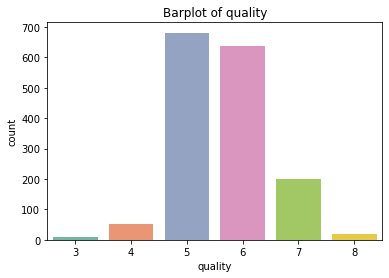

In [16]:
sns.countplot(x = 'quality', data=wine, palette ='Set2')
plt.title('Barplot of quality')

## fixed_acidity

Text(0.5, 1.0, 'Histogram of fixed_acidity')

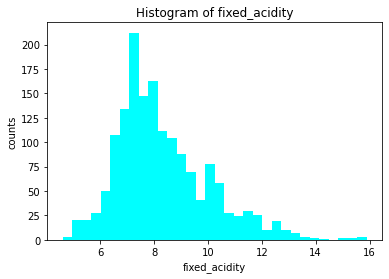

In [17]:
plt.hist(wine.fixed_acidity, bins = 'auto', facecolor = 'cyan')
plt.xlabel('fixed_acidity')
plt.ylabel('counts')
plt.title('Histogram of fixed_acidity')

Text(0.5, 1.0, 'Boxplot: fixed_acidity')

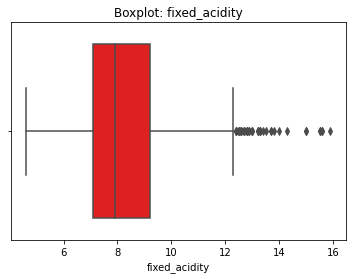

In [18]:
wine['fixed_acidity'] = wine['fixed_acidity'].astype('float64')
sns.boxplot(x=wine.fixed_acidity, color = 'red', orient= 'h')
plt.title("Boxplot: fixed_acidity")

In [19]:
median = np.median(wine.fixed_acidity)
median

7.9

In [20]:
upper_quartile = np.percentile(wine.fixed_acidity, 75)
upper_quartile

9.2

In [21]:
lower_quartile = np.percentile(wine.fixed_acidity, 25)
lower_quartile

7.1

In [22]:
iqr = upper_quartile - lower_quartile
iqr

2.0999999999999996

In [23]:
upper_whisker = wine.fixed_acidity[wine.fixed_acidity<=upper_quartile+1.5*iqr].max()
upper_whisker

12.3

In [24]:
lower_whisker = wine.fixed_acidity[wine.fixed_acidity>=lower_quartile-1.5*iqr].min()
lower_whisker

4.6

In [25]:
kpl_IQR = wine.fixed_acidity.describe()['75%']-wine.fixed_acidity.describe()['25%']
kpl_uplim = wine.fixed_acidity.describe()['75%']+1.5*kpl_IQR
len(wine.fixed_acidity[wine.fixed_acidity > kpl_uplim])

49

In [26]:
wine.fixed_acidity = np.where(wine.fixed_acidity>upper_whisker, upper_whisker, wine.fixed_acidity)

Text(0.5, 1.0, 'Boxplot: fixed_acidity')

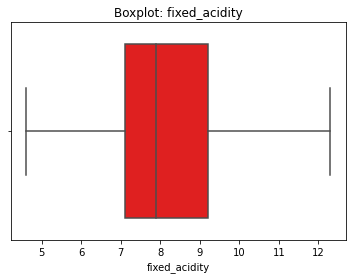

In [27]:
wine['fixed_acidity'] = wine['fixed_acidity'].astype('float64')
sns.boxplot(x=wine.fixed_acidity, color = 'red', orient= 'h')
plt.title("Boxplot: fixed_acidity")

In [3]:
mod = ols('quality~fixed_acidity', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

NameError: name 'wine' is not defined

## volatile_acidity

Text(0.5, 1.0, 'Histogram of volatile_acidity')

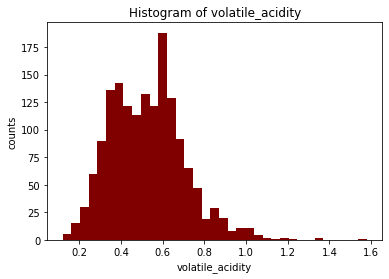

In [29]:
plt.hist(wine.volatile_acidity, bins = 'auto', facecolor = 'maroon')
plt.xlabel('volatile_acidity')
plt.ylabel('counts')
plt.title('Histogram of volatile_acidity')

Text(0.5, 1.0, 'Boxplot: volatile_acidity')

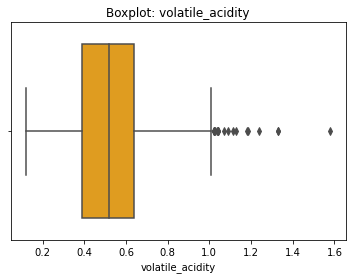

In [30]:
wine['volatile_acidity'] = wine['volatile_acidity'].astype('float64')
sns.boxplot(x=wine.volatile_acidity, color = 'orange', orient= 'h')
plt.title("Boxplot: volatile_acidity")

In [31]:
kpl_IQR = wine.volatile_acidity.describe()['75%']-wine.volatile_acidity.describe()['25%']
kpl_uplim = wine.volatile_acidity.describe()['75%']+1.5*kpl_IQR
len(wine.volatile_acidity[wine.volatile_acidity > kpl_uplim])

19

In [32]:
median = np.median(wine.volatile_acidity)
median

0.52

In [33]:
upper_quartile = np.percentile(wine.volatile_acidity, 75)
upper_quartile

0.64

In [34]:
lower_quartile = np.percentile(wine.volatile_acidity, 25)
lower_quartile

0.39

In [35]:
iqr = upper_quartile - lower_quartile
iqr

0.25

In [36]:
upper_whisker = wine.volatile_acidity[wine.volatile_acidity<=upper_quartile+1.5*iqr].max()
upper_whisker

1.01

In [37]:
lower_whisker = wine.volatile_acidity[wine.volatile_acidity>=lower_quartile-1.5*iqr].min()
lower_whisker

0.12

In [38]:
wine.volatile_acidity = np.where(wine.volatile_acidity>upper_whisker, upper_whisker, wine.volatile_acidity)

Text(0.5, 1.0, 'Boxplot: volatile_acidity')

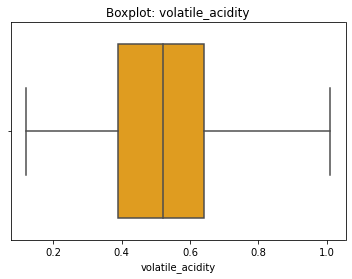

In [39]:
wine['volatile_acidity'] = wine['volatile_acidity'].astype('float64')
sns.boxplot(x=wine.volatile_acidity, color = 'orange', orient= 'h')
plt.title("Boxplot: volatile_acidity")

In [40]:
mod = ols(' volatile_acidity~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df     sum_sq   mean_sq           F        PR(>F)
quality      1.0   7.254067  7.254067  282.145757  1.958760e-58
Residual  1597.0  41.059434  0.025710         NaN           NaN


## citric_acid

Text(0.5, 1.0, 'Histogram of citric_acid')

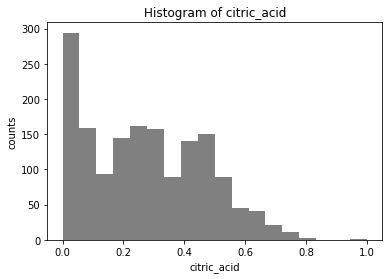

In [41]:
plt.hist(wine.citric_acid, bins = 'auto', facecolor = 'grey')
plt.xlabel('citric_acid')
plt.ylabel('counts')
plt.title('Histogram of citric_acid')

Text(0.5, 1.0, 'Boxplot: citric_acid')

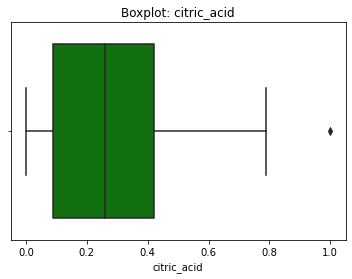

In [42]:
wine['citric_acid'] = wine['citric_acid'].astype('float64')
sns.boxplot(x=wine.citric_acid, color = 'green', orient= 'h')
plt.title("Boxplot: citric_acid")

In [43]:
kpl_IQR = wine.citric_acid.describe()['75%']-wine.citric_acid.describe()['25%']
kpl_uplim = wine.citric_acid.describe()['75%']+1.5*kpl_IQR
len(wine.citric_acid[wine.citric_acid > kpl_uplim])

1

In [44]:
median = np.median(wine.citric_acid)
median

0.26

In [45]:
upper_quartile = np.percentile(wine.citric_acid, 75)
upper_quartile

0.42

In [46]:
lower_quartile = np.percentile(wine.citric_acid, 25)
lower_quartile

0.09

In [47]:
iqr = upper_quartile - lower_quartile
iqr

0.32999999999999996

In [48]:
upper_whisker = wine.citric_acid[wine.citric_acid<=upper_quartile+1.5*iqr].max()
upper_whisker

0.79

In [49]:
lower_whisker = wine.citric_acid[wine.citric_acid>=lower_quartile-1.5*iqr].min()
lower_whisker

0.0

In [50]:
wine.citric_acid = np.where(wine.citric_acid>upper_whisker, upper_whisker, wine.citric_acid)

Text(0.5, 1.0, 'Boxplot: citric_acid')

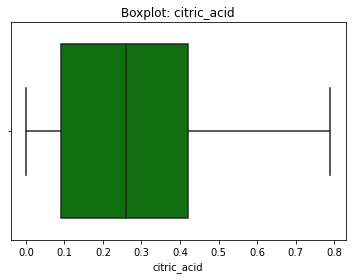

In [51]:
wine['citric_acid'] = wine['citric_acid'].astype('float64')
sns.boxplot(x=wine.citric_acid, color = 'green', orient= 'h')
plt.title("Boxplot: citric_acid")

In [52]:
mod = ols(' citric_acid~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df     sum_sq   mean_sq          F        PR(>F)
quality      1.0   3.145106  3.145106  87.759622  2.429171e-20
Residual  1597.0  57.232855  0.035838        NaN           NaN


## residual_sugar

Text(0.5, 1.0, 'Histogram of residual_sugar')

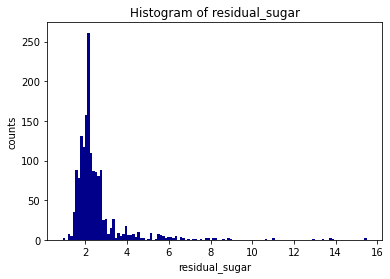

In [53]:
plt.hist(wine.residual_sugar, bins = 'auto', facecolor = 'darkblue')
plt.xlabel('residual_sugar')
plt.ylabel('counts')
plt.title('Histogram of residual_sugar')

Text(0.5, 1.0, 'Boxplot: residual_sugar')

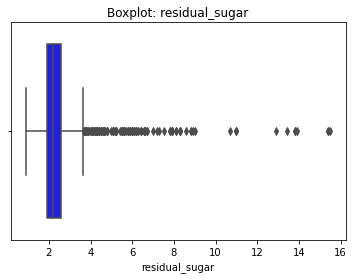

In [54]:
wine['residual_sugar'] = wine['residual_sugar'].astype('float64')
sns.boxplot(x=wine.residual_sugar, color = 'blue', orient= 'h')
plt.title("Boxplot: residual_sugar")

In [55]:
kpl_IQR = wine.residual_sugar.describe()['75%']-wine.residual_sugar.describe()['25%']
kpl_uplim = wine.residual_sugar.describe()['75%']+1.5*kpl_IQR
len(wine.residual_sugar[wine.residual_sugar > kpl_uplim])

155

In [56]:
median = np.median(wine.residual_sugar)
median

2.2

In [57]:
upper_quartile = np.percentile(wine.residual_sugar, 75)
upper_quartile

2.6

In [58]:
lower_quartile = np.percentile(wine.residual_sugar, 25)
lower_quartile

1.9

In [59]:
iqr = upper_quartile - lower_quartile
iqr

0.7000000000000002

In [60]:
upper_whisker = wine.residual_sugar[wine.residual_sugar<=upper_quartile+1.5*iqr].max()
upper_whisker

3.65

In [61]:
lower_whisker = wine.residual_sugar[wine.residual_sugar>=lower_quartile-1.5*iqr].min()
lower_whisker

0.9

In [62]:
wine.residual_sugar = np.where(wine.residual_sugar>upper_whisker, upper_whisker, wine.residual_sugar)

Text(0.5, 1.0, 'Boxplot: residual_sugar')

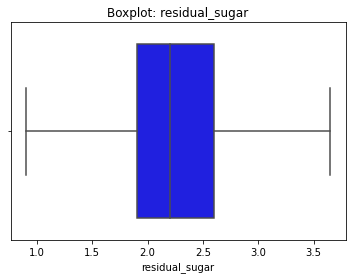

In [63]:
wine['residual_sugar'] = wine['residual_sugar'].astype('float64')
sns.boxplot(x=wine.residual_sugar, color = 'blue', orient= 'h')
plt.title("Boxplot: residual_sugar")

In [64]:
mod = ols(' residual_sugar~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df      sum_sq   mean_sq         F    PR(>F)
quality      1.0    0.335980  0.335980  0.904376  0.341755
Residual  1597.0  593.292232  0.371504       NaN       NaN


## chlorides

Text(0.5, 1.0, 'Histogram of chlorides')

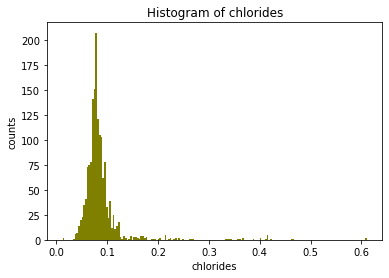

In [65]:
plt.hist(wine.chlorides, bins = 'auto', facecolor = 'olive')
plt.xlabel('chlorides')
plt.ylabel('counts')
plt.title('Histogram of chlorides')

Text(0.5, 1.0, 'Boxplot: chlorides')

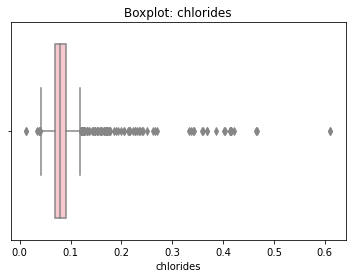

In [66]:
wine['chlorides'] = wine['chlorides'].astype('float64')
sns.boxplot(x=wine.chlorides, color = 'pink', orient= 'h')
plt.title("Boxplot: chlorides")

In [67]:
kpl_IQR = wine.chlorides.describe()['75%']-wine.chlorides.describe()['25%']
kpl_uplim = wine.chlorides.describe()['75%']+1.5*kpl_IQR
len(wine.chlorides[wine.chlorides > kpl_uplim])

103

In [68]:
median = np.median(wine.chlorides)
median

0.079

In [69]:
upper_quartile = np.percentile(wine.chlorides, 75)
upper_quartile

0.09

In [70]:
lower_quartile = np.percentile(wine.chlorides, 25)
lower_quartile

0.07

In [71]:
iqr = upper_quartile - lower_quartile
iqr

0.01999999999999999

In [72]:
upper_whisker = wine.chlorides[wine.chlorides<=upper_quartile+1.5*iqr].max()
upper_whisker

0.119

In [73]:
lower_whisker = wine.chlorides[wine.chlorides>=lower_quartile-1.5*iqr].min()
lower_whisker

0.041

In [74]:
wine.chlorides = np.where(wine.chlorides>upper_whisker, upper_whisker, wine.chlorides)
wine.chlorides = np.where(wine.chlorides<lower_whisker, lower_whisker, wine.chlorides)


Text(0.5, 1.0, 'Boxplot: chlorides')

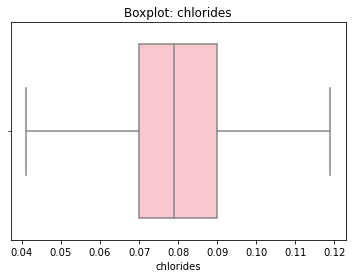

In [75]:
wine['chlorides'] = wine['chlorides'].astype('float64')
sns.boxplot(x=wine.chlorides, color = 'pink', orient= 'h')
plt.title("Boxplot: chlorides")

In [76]:
mod = ols(' chlorides~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df    sum_sq   mean_sq         F        PR(>F)
quality      1.0  0.016766  0.016766  55.52704  1.502769e-13
Residual  1597.0  0.482192  0.000302       NaN           NaN


## free_sulfur_dioxide

Text(0.5, 1.0, 'Histogram of free_sulfur_dioxide')

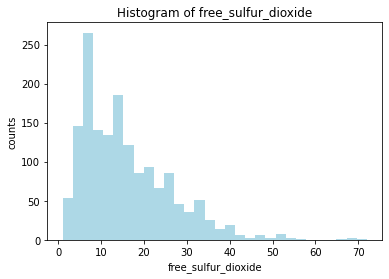

In [77]:
plt.hist(wine.free_sulfur_dioxide, bins = 'auto', facecolor = 'lightblue')
plt.xlabel('free_sulfur_dioxide')
plt.ylabel('counts')
plt.title('Histogram of free_sulfur_dioxide')

Text(0.5, 1.0, 'Boxplot: free_sulfur_dioxide')

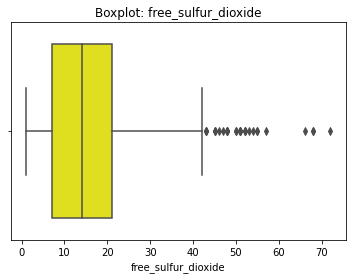

In [78]:
wine['free_sulfur_dioxide'] = wine['free_sulfur_dioxide'].astype('float64')
sns.boxplot(x=wine.free_sulfur_dioxide, color = 'yellow', orient= 'h')
plt.title("Boxplot: free_sulfur_dioxide")

In [79]:
kpl_IQR = wine.free_sulfur_dioxide.describe()['75%']-wine.free_sulfur_dioxide.describe()['25%']
kpl_uplim = wine.free_sulfur_dioxide.describe()['75%']+1.5*kpl_IQR
len(wine.free_sulfur_dioxide[wine.free_sulfur_dioxide > kpl_uplim])

30

In [80]:
median = np.median(wine.free_sulfur_dioxide)
median

14.0

In [81]:
upper_quartile = np.percentile(wine.free_sulfur_dioxide, 75)
upper_quartile

21.0

In [82]:
lower_quartile = np.percentile(wine.free_sulfur_dioxide, 25)
lower_quartile

7.0

In [83]:
iqr = upper_quartile - lower_quartile
iqr

14.0

In [84]:
upper_whisker = wine.free_sulfur_dioxide[wine.free_sulfur_dioxide<=upper_quartile+1.5*iqr].max()
upper_whisker

42.0

In [85]:
lower_whisker = wine.free_sulfur_dioxide[wine.free_sulfur_dioxide>=lower_quartile-1.5*iqr].min()
lower_whisker

1.0

In [86]:
wine.free_sulfur_dioxide = np.where(wine.free_sulfur_dioxide>upper_whisker, upper_whisker, wine.free_sulfur_dioxide)

Text(0.5, 1.0, 'Boxplot: free_sulfur_dioxide')

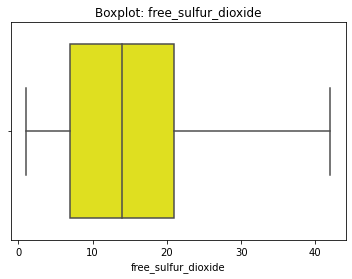

In [87]:
wine['free_sulfur_dioxide'] = wine['free_sulfur_dioxide'].astype('float64')
sns.boxplot(x=wine.free_sulfur_dioxide, color = 'yellow', orient= 'h')
plt.title("Boxplot: free_sulfur_dioxide")

In [88]:
mod = ols(' free_sulfur_dioxide~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df         sum_sq     mean_sq         F    PR(>F)
quality      1.0     396.593887  396.593887  4.106013  0.042897
Residual  1597.0  154251.928940   96.588559       NaN       NaN


## total_sulfur_dioxide

Text(0.5, 1.0, 'Histogram of total_sulfur_dioxide')

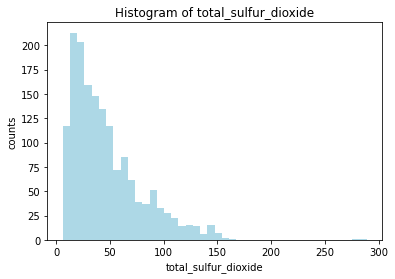

In [89]:
plt.hist(wine.total_sulfur_dioxide, bins = 'auto', facecolor = 'lightblue')
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('counts')
plt.title('Histogram of total_sulfur_dioxide')

Text(0.5, 1.0, 'Boxplot: total_sulfur_dioxide')

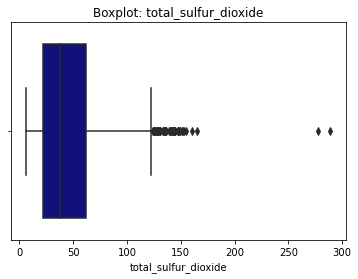

In [90]:
wine['total_sulfur_dioxide'] = wine['total_sulfur_dioxide'].astype('float64')
sns.boxplot(x=wine.total_sulfur_dioxide, color = 'darkblue', orient= 'h')
plt.title("Boxplot: total_sulfur_dioxide")

In [91]:
kpl_IQR = wine.total_sulfur_dioxide.describe()['75%']-wine.total_sulfur_dioxide.describe()['25%']
kpl_uplim = wine.total_sulfur_dioxide.describe()['75%']+1.5*kpl_IQR
len(wine.total_sulfur_dioxide[wine.total_sulfur_dioxide > kpl_uplim])

55

In [92]:
median = np.median(wine.total_sulfur_dioxide)
median

38.0

In [93]:
upper_quartile = np.percentile(wine.total_sulfur_dioxide, 75)
upper_quartile

62.0

In [94]:
lower_quartile = np.percentile(wine.total_sulfur_dioxide, 25)
lower_quartile

22.0

In [95]:
iqr = upper_quartile - lower_quartile
iqr

40.0

In [96]:
upper_whisker = wine.total_sulfur_dioxide[wine.total_sulfur_dioxide<=upper_quartile+1.5*iqr].max()
upper_whisker

122.0

In [97]:
lower_whisker = wine.total_sulfur_dioxide[wine.total_sulfur_dioxide>=lower_quartile-1.5*iqr].min()
lower_whisker

6.0

In [98]:
wine.total_sulfur_dioxide = np.where(wine.total_sulfur_dioxide>upper_whisker, upper_whisker, wine.total_sulfur_dioxide)

Text(0.5, 1.0, 'Boxplot: total_sulfur_dioxide')

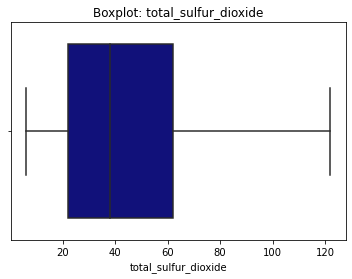

In [99]:
wine['total_sulfur_dioxide'] = wine['total_sulfur_dioxide'].astype('float64')
sns.boxplot(x=wine.total_sulfur_dioxide, color = 'darkblue', orient= 'h')
plt.title("Boxplot: total_sulfur_dioxide")

In [100]:
mod = ols(' total_sulfur_dioxide~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df        sum_sq       mean_sq          F        PR(>F)
quality      1.0  5.988455e+04  59884.546892  67.615639  4.068451e-16
Residual  1597.0  1.414401e+06    885.661185        NaN           NaN


## density

In [101]:
wine.density.value_counts()

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64

Text(0.5, 1.0, 'Histogram of density')

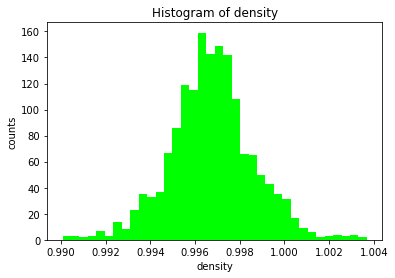

In [102]:
plt.hist(wine.density, bins = 'auto', facecolor = 'lime')
plt.xlabel('density')
plt.ylabel('counts')
plt.title('Histogram of density')

Text(0.5, 1.0, 'Boxplot: density')

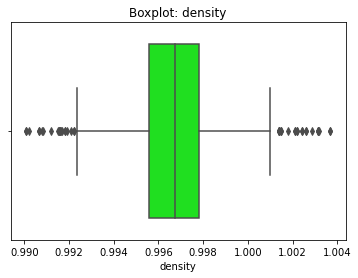

In [103]:
wine['density'] = wine['density'].astype('float64')
sns.boxplot(x=wine.density, color = 'lime', orient= 'h')
plt.title("Boxplot: density")

In [104]:
kpl_IQR = wine.density.describe()['75%']-wine.density.describe()['25%']
kpl_uplim = wine.density.describe()['75%']+1.5*kpl_IQR
len(wine.density[wine.density > kpl_uplim])

24

In [105]:
median = np.median(wine.density)
median

0.99675

In [106]:
upper_quartile = np.percentile(wine.density, 75)
upper_quartile

0.997835

In [107]:
lower_quartile = np.percentile(wine.density, 25)
lower_quartile

0.9956

In [108]:
iqr = upper_quartile - lower_quartile
iqr

0.002234999999999987

In [109]:
upper_whisker = wine.density[wine.density<=upper_quartile+1.5*iqr].max()
upper_whisker

1.001

In [110]:
lower_whisker = wine.density[wine.density>=lower_quartile-1.5*iqr].min()
lower_whisker

0.99235

In [111]:
wine.density = np.where(wine.density>upper_whisker, upper_whisker, wine.density)
wine.density = np.where(wine.density<lower_whisker, lower_whisker, wine.density)

Text(0.5, 1.0, 'Boxplot: density')

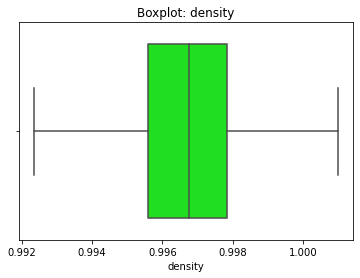

In [112]:
wine['density'] = wine['density'].astype('float64')
sns.boxplot(x=wine.density, color = 'lime', orient= 'h')
plt.title("Boxplot: density")

In [113]:
mod = ols(' density~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df    sum_sq   mean_sq          F        PR(>F)
quality      1.0  0.000161  0.000161  51.558041  1.061259e-12
Residual  1597.0  0.004993  0.000003        NaN           NaN


## pH

Text(0.5, 1.0, 'Histogram of density')

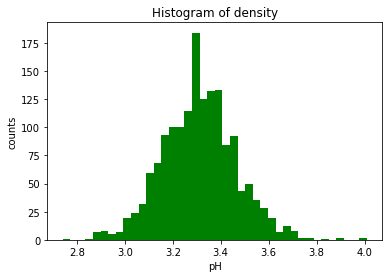

In [114]:
plt.hist(wine.pH, bins = 'auto', facecolor = 'green')
plt.xlabel('pH')
plt.ylabel('counts')
plt.title('Histogram of density')

Text(0.5, 1.0, 'Boxplot: pH')

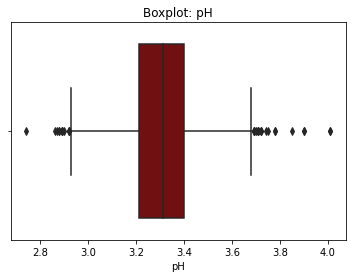

In [115]:
wine['pH'] = wine['pH'].astype('float64')
sns.boxplot(x=wine.pH, color = 'maroon', orient= 'h')
plt.title("Boxplot: pH")

In [116]:
kpl_IQR = wine.pH.describe()['75%']-wine.pH.describe()['25%']
kpl_uplim = wine.pH.describe()['75%']+1.5*kpl_IQR
len(wine.pH[wine.pH > kpl_uplim])


21

In [117]:
median = np.median(wine.pH)
median

3.31

In [118]:
upper_quartile = np.percentile(wine.pH, 75)
upper_quartile

3.4

In [119]:
lower_quartile = np.percentile(wine.pH, 25)
lower_quartile

3.21

In [120]:
iqr = upper_quartile - lower_quartile
iqr

0.18999999999999995

In [121]:
upper_whisker = wine.pH[wine.pH<=upper_quartile+1.5*iqr].max()
upper_whisker

3.68

In [122]:
lower_whisker = wine.pH[wine.pH>=lower_quartile-1.5*iqr].min()
lower_whisker

2.93

In [123]:
wine.pH = np.where(wine.pH>upper_whisker, upper_whisker, wine.pH)
wine.pH = np.where(wine.pH<lower_whisker, lower_whisker, wine.pH)

Text(0.5, 1.0, 'Boxplot: pH')

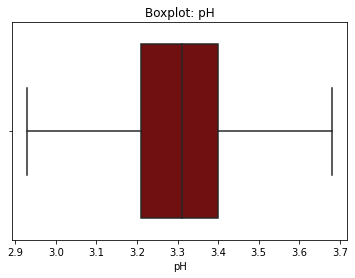

In [124]:
wine['pH'] = wine['pH'].astype('float64')
sns.boxplot(x=wine.pH, color = 'maroon', orient= 'h')
plt.title("Boxplot: pH")

In [125]:
mod = ols(' pH~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df     sum_sq   mean_sq         F    PR(>F)
quality      1.0   0.136271  0.136271  6.110378  0.013543
Residual  1597.0  35.615653  0.022302       NaN       NaN


## sulphates

Text(0.5, 1.0, 'Histogram of sulphates')

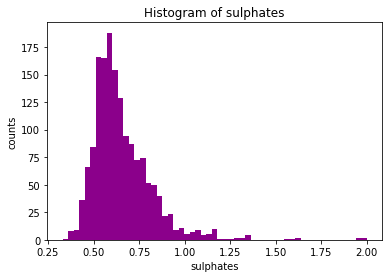

In [126]:
plt.hist(wine.sulphates, bins = 'auto', facecolor = 'darkmagenta')
plt.xlabel('sulphates')
plt.ylabel('counts')
plt.title('Histogram of sulphates')

Text(0.5, 1.0, 'Boxplot: sulphates')

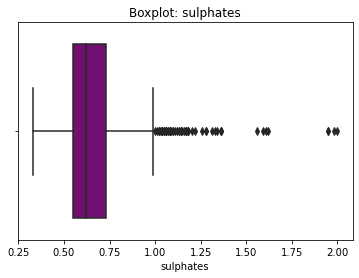

In [127]:
wine['sulphates'] = wine['sulphates'].astype('float64')
sns.boxplot(x=wine.sulphates, color = 'purple', orient= 'h')
plt.title("Boxplot: sulphates")

In [128]:
kpl_IQR = wine.sulphates.describe()['75%']-wine.sulphates.describe()['25%']
kpl_uplim = wine.sulphates.describe()['75%']+1.5*kpl_IQR
len(wine.sulphates[wine.sulphates > kpl_uplim])

59

In [129]:
median = np.median(wine.sulphates)
median

0.62

In [130]:
upper_quartile = np.percentile(wine.sulphates, 75)
upper_quartile

0.73

In [131]:
lower_quartile = np.percentile(wine.sulphates, 25)
lower_quartile

0.55

In [132]:
iqr = upper_quartile - lower_quartile
iqr

0.17999999999999994

In [133]:
upper_whisker = wine.sulphates[wine.sulphates<=upper_quartile+1.5*iqr].max()
upper_whisker

0.99

In [134]:
lower_whisker = wine.sulphates[wine.sulphates>=lower_quartile-1.5*iqr].min()
lower_whisker

0.33

In [135]:
wine.sulphates = np.where(wine.sulphates>upper_whisker, upper_whisker, wine.sulphates)

Text(0.5, 1.0, 'Boxplot: sulphates')

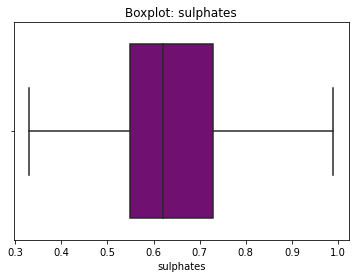

In [136]:
wine['sulphates'] = wine['sulphates'].astype('float64')
sns.boxplot(x=wine.sulphates, color = 'purple', orient= 'h')
plt.title("Boxplot: sulphates")

In [137]:
mod = ols(' sulphates~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df     sum_sq   mean_sq           F        PR(>F)
quality      1.0   3.247625  3.247625  196.640561  3.230858e-42
Residual  1597.0  26.375313  0.016516         NaN           NaN


## alcohol

Text(0.5, 1.0, 'Histogram of alcohol')

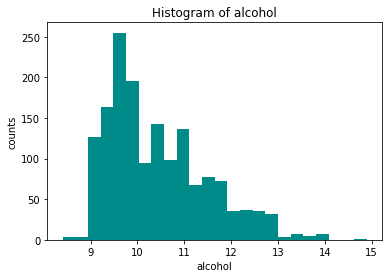

In [138]:
plt.hist(wine.alcohol, bins = 'auto', facecolor = 'darkcyan')
plt.xlabel('alcohol')
plt.ylabel('counts')
plt.title('Histogram of alcohol')

Text(0.5, 1.0, 'Boxplot: alcohol')

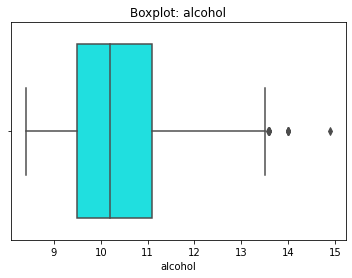

In [139]:
wine['alcohol'] = wine['alcohol'].astype('float64')
sns.boxplot(x=wine.alcohol, color = 'cyan', orient= 'h')
plt.title("Boxplot: alcohol")

In [140]:
kpl_IQR = wine.alcohol.describe()['75%']-wine.alcohol.describe()['25%']
kpl_uplim = wine.alcohol.describe()['75%']+1.5*kpl_IQR
len(wine.alcohol[wine.alcohol > kpl_uplim])

13

In [141]:
median = np.median(wine.alcohol)
median

10.2

In [142]:
upper_quartile = np.percentile(wine.alcohol, 75)
upper_quartile

11.1

In [143]:
lower_quartile = np.percentile(wine.alcohol, 25)
lower_quartile

9.5

In [144]:
iqr = upper_quartile - lower_quartile
iqr

1.5999999999999996

In [145]:
upper_whisker = wine.alcohol[wine.alcohol<=upper_quartile+1.5*iqr].max()
upper_whisker

13.5

In [146]:
lower_whisker = wine.alcohol[wine.alcohol>=lower_quartile-1.5*iqr].min()
lower_whisker

8.4

In [147]:
wine.alcohol = np.where(wine.alcohol>upper_whisker, upper_whisker, wine.alcohol)

Text(0.5, 1.0, 'Boxplot: alcohol')

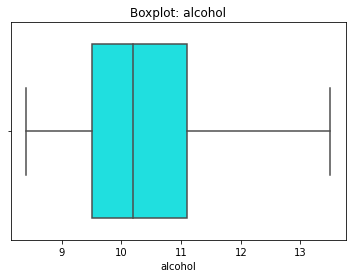

In [148]:
wine['alcohol'] = wine['alcohol'].astype('float64')
sns.boxplot(x=wine.alcohol, color = 'cyan', orient= 'h')
plt.title("Boxplot: alcohol")

In [149]:
mod = ols('alcohol ~quality', data = wine).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df       sum_sq     mean_sq           F        PR(>F)
quality      1.0   407.182795  407.182795  474.379311  2.660937e-92
Residual  1597.0  1370.782638    0.858349         NaN           NaN


In [150]:
wine = wine.drop(['residual_sugar'], axis = 1)

In [151]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free_sulfur_dioxide   1599 non-null   float64
 5   total_sulfur_dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [152]:
x = df.iloc[:, [0,1,2,3,4,5,6,7,8,9]]

In [153]:
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

In [154]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                           for i in range(len(x.columns))]

In [155]:
print(vif_data)

               features          VIF
0         fixed_acidity    79.525337
1      volatile_acidity    17.857388
2           citric_acid     8.488147
3        residual_sugar    17.757670
4             chlorides    26.548635
5   free_sulfur_dioxide     7.186833
6  total_sulfur_dioxide     7.155027
7               density  1507.274541
8                    pH  1068.228017
9             sulphates    28.233269


In [156]:
wine = wine.drop(['fixed_acidity','volatile_acidity','chlorides','density','pH','sulphates'], axis=1)

## corelation

In [157]:
countinue_column = wine.select_dtypes(include= 'number')

In [158]:
print(countinue_column)

      citric_acid  free_sulfur_dioxide  total_sulfur_dioxide  alcohol  quality
0            0.00                 11.0                  34.0      9.4        5
1            0.00                 25.0                  67.0      9.8        5
2            0.04                 15.0                  54.0      9.8        5
3            0.56                 17.0                  60.0      9.8        6
4            0.00                 11.0                  34.0      9.4        5
...           ...                  ...                   ...      ...      ...
1594         0.08                 32.0                  44.0     10.5        5
1595         0.10                 39.0                  51.0     11.2        6
1596         0.13                 29.0                  40.0     11.0        6
1597         0.12                 32.0                  44.0     10.2        5
1598         0.47                 18.0                  42.0     11.0        6

[1599 rows x 5 columns]


In [159]:
countinue_column.corr()

,citric_acid,free_sulfur_dioxide,total_sulfur_dioxide,alcohol,quality
citric_acid,1.000000,-0.060880,0.018992,0.112164,0.228233
free_sulfur_dioxide,-0.060880,1.000000,0.687184,-0.068099,-0.050641
total_sulfur_dioxide,0.018992,0.687184,1.000000,-0.228860,-0.201542
alcohol,0.112164,-0.068099,-0.228860,1.000000,0.478556
quality,0.228233,-0.050641,-0.201542,0.478556,1.000000


<AxesSubplot:>

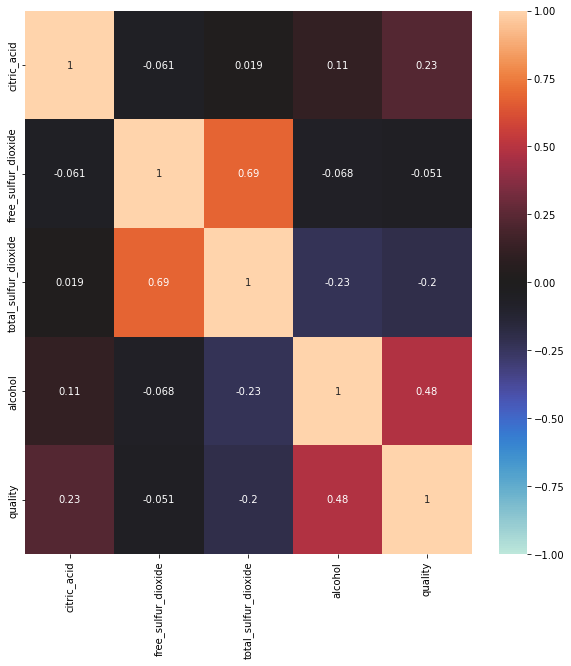

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(countinue_column.corr(), annot=True, vmin= -1, vmax=1, cmap = 'icefire')

In [161]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   citric_acid           1599 non-null   float64
 1   free_sulfur_dioxide   1599 non-null   float64
 2   total_sulfur_dioxide  1599 non-null   float64
 3   alcohol               1599 non-null   float64
 4   quality               1599 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.6 KB


In [162]:
X = df.loc[:, df.columns != 'quality']
y = df.loc[:, df.columns == 'quality']

In [163]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## One over Rest model

In [164]:
wine = LogisticRegression(multi_class= 'ovr')
wine.fit(X,y)
print("oaa=", wine.score(X,y))

oaa= 0.6035021888680425


In [165]:
pred_ovr = wine.predict(X)
print("ovr\n")
print(metrics.confusion_matrix(y, pred_ovr))
print(metrics.classification_report(y, pred_ovr))

ovr

[[  0   0   9   1   0   0]
 [  0   0  39  13   1   0]
 [  0   0 540 140   1   0]
 [  0   0 229 397  12   0]
 [  0   0  12 159  28   0]
 [  0   0   0  13   5   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.65      0.79      0.72       681
           6       0.55      0.62      0.58       638
           7       0.60      0.14      0.23       199
           8       0.00      0.00      0.00        18

    accuracy                           0.60      1599
   macro avg       0.30      0.26      0.25      1599
weighted avg       0.57      0.60      0.57      1599



## Multinomial

In [166]:
wine = LogisticRegression(multi_class= 'multinomial')
wine.fit(X,y)
print("oaa=", wine.score(X,y))

oaa= 0.608505315822389


In [167]:
pred_mul = wine.predict(X)
print("mul\n")
print(metrics.confusion_matrix(y, pred_mul))
print(metrics.classification_report(y, pred_mul))

mul

[[  0   0   9   1   0   0]
 [  0   0  38  14   1   0]
 [  0   0 522 157   2   0]
 [  0   0 207 396  35   0]
 [  0   0  10 134  55   0]
 [  0   0   0  11   7   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.66      0.77      0.71       681
           6       0.56      0.62      0.59       638
           7       0.55      0.28      0.37       199
           8       0.00      0.00      0.00        18

    accuracy                           0.61      1599
   macro avg       0.29      0.28      0.28      1599
weighted avg       0.57      0.61      0.58      1599

